## Name: Aman Sharma
##  Data Visualization III

### Importing all the necessary the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
iris = pd.read_csv("Iris.csv")

In [5]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [39]:
print(iris["Species"].unique())
print(iris["Species"].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


### As observed above, we have 4 feature variables - SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, all of which are numerical. The target variable Species is a categorical/nominal variable with 3 different unique types - Iris-setosa, Iris-versicolor and Iris-virginica. The target variables are equal in count with each variable appearing exactly 50 times.

### Next, we will plot histograms for all of the variables

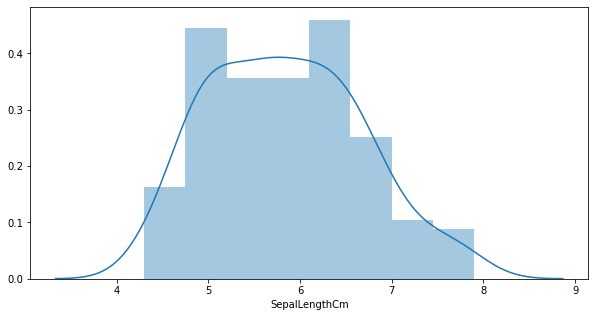

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(iris["SepalLengthCm"])

### The variable SepalLengthCm appears to be normally distributed in the range of 0 to 9 centimeter. Majority of the values lie in the range 5 to 7.

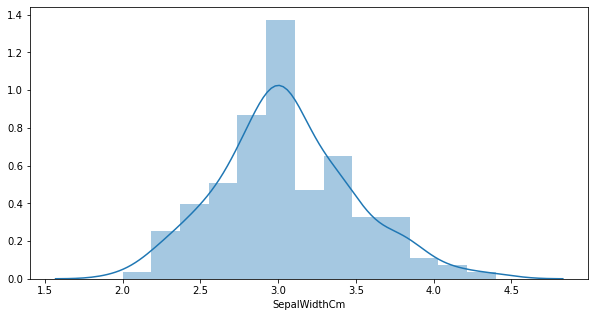

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(iris["SepalWidthCm"])

### The variable SepalWidthCm appears to be normally distributed in the range of 1.5 to 4.5 centimeter. A large number of values lie in the range 2.5 to 3.5.

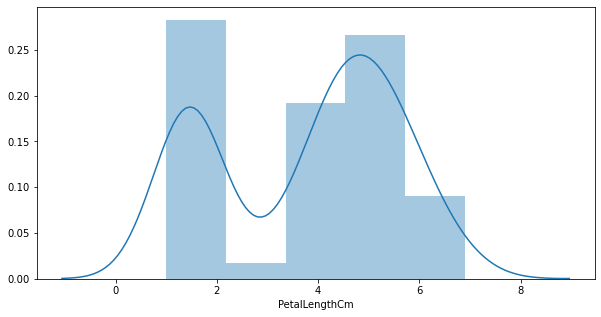

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(iris["PetalLengthCm"])

### The variable PetalLengthCm is NOT normally distributed. The distribution is extremely uneven with many values close to 2 centimeter and many values close to 5 centimeter.

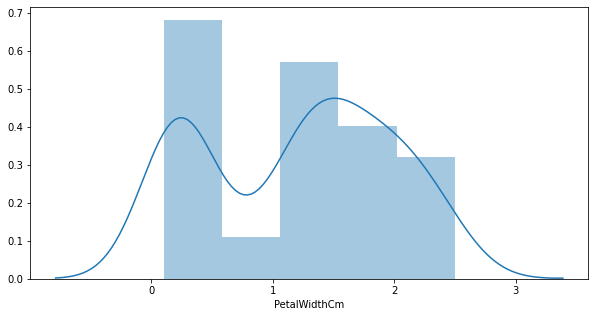

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(iris["PetalWidthCm"])

### The variable PetalWidthCm is NOT normally distributed. The distribution is extremely uneven with many values in the range of 0 to 1 and then decreasing number of values in the range 1 to 2.

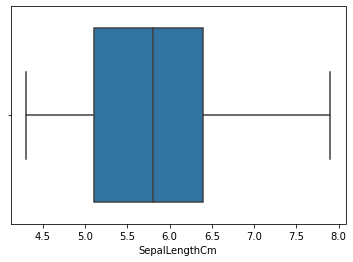

In [32]:
sns.boxplot(iris['SepalLengthCm'])

### The boxplot of SepalLengthCm tells us that there are no outliers in the variable. Most of the data values lie in the range 5 to 6 centimter.

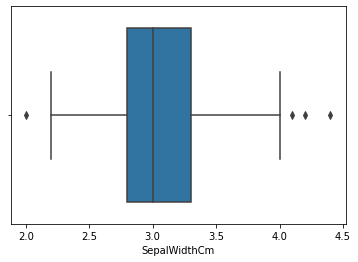

In [31]:
sns.boxplot(iris['SepalWidthCm'])

### The boxplot of SepalWidthCm tells us that there may be outliers in the variable. The outliers approximately lie outside the range of 2.25 to 4 centimeter. Most of data values are between 2.5 to 3.5 centimeter.

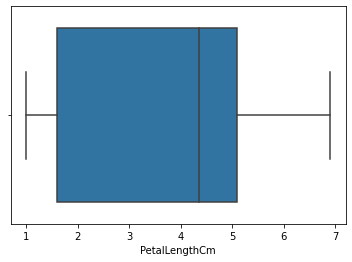

In [33]:
sns.boxplot(iris['PetalLengthCm'])

### The boxplot of PetalLengthCm tells us that there are no outliers in the variable. Most of data values lie in the range 2 to 5 centimeter. It also appears that the data values may not be evenly distributed because the median line is skewed to the right.

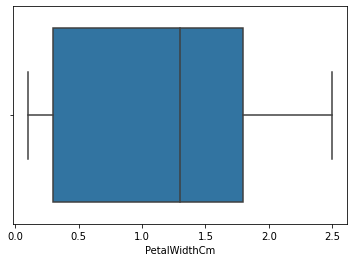

In [34]:
sns.boxplot(iris['PetalWidthCm'])

### The boxplot of PetalWidthCm tells us that there are no outliers in the variable. Most of data values lie in the range 0.5 to 2.0 centimeter. It also appears that the data values may not be evenly distributed because the median line is skewed to the right.

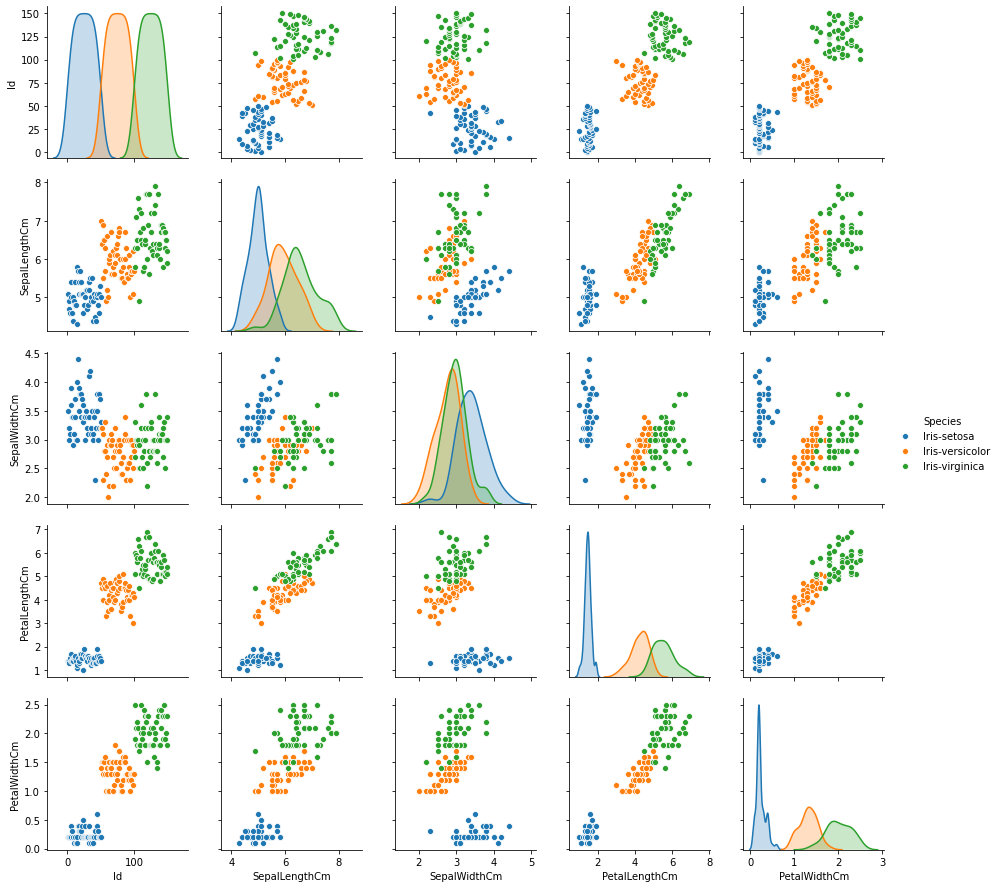

In [42]:
sns.pairplot(iris,hue="Species")

### From the pairplot plotted above, we can conclude that classification for the "Species" variable can be better done if use the variables "PetalLengthCm" and "PetalWidthCm"

### As we had observed above, the variable SepalWidthCm may have some oultiers. We will remove these outliers using the Inter-quartile range method.

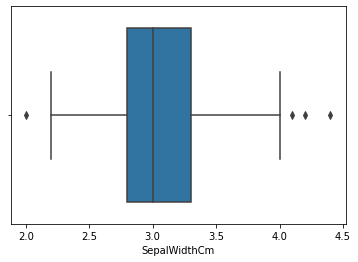

In [46]:
sns.boxplot(iris['SepalWidthCm'])

### The boxplot of SepalWidthCm tells us that there may be outliers in the variable. The outliers approximately lie outside the range of 2.25 to 4 centimeter. Most of data values are between 2.5 to 3.5 centimeter.

In [43]:
Q1=iris['SepalWidthCm'].quantile(0.25)
Q3=iris['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1
print("IQR(", IQR, ") =", "Q3(", Q3, ")- Q1(", Q1, ")")

IQR( 0.5 ) = Q3( 3.3 )- Q1( 2.8 )


In [49]:
lower_limit=Q1-1.3*IQR
upper_limit=Q3+1.4*IQR
lower_limit,upper_limit

(2.15, 4.0)

### Thus, we have defined the appropriate values for the lower_limit and upper_limit to remove the outliers.

In [50]:
df[(df['SepalWidthCm']<lower_limit)|(df['SepalWidthCm']>upper_limit)]

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor

In [51]:
df_without_outliers=df[(df['SepalWidthCm']>lower_limit)&(df['SepalWidthCm']<upper_limit)]
df_without_outliers

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[145 rows x 6 columns]